# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [20]:
# Code Here
from palmerpenguins import load_penguins
df = load_penguins()
df
# you would need to dummify species, island, sex

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [28]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

Degree 1 model coefficients:
Intercept: 20.78664866843383
Coefficients: [ 0.         -0.08232675]


Degree 1 model coefficients:
Intercept: 20.78664866843383
Coefficients: [ 0.         -0.08232675]


Degree 2 model coefficients:
Intercept: 49.49494362319112
Coefficients: [ 0.         -1.40407712  0.01498039]


Degree 2 model coefficients:
Intercept: 49.49494362319112
Coefficients: [ 0.         -1.40407712  0.01498039]


Degree 3 model coefficients:
Intercept: -70.5317265960242
Coefficients: [ 0.00000000e+00  6.77963360e+00 -1.68915134e-01  1.36264370e-03]


Degree 3 model coefficients:
Intercept: -70.5317265960242
Coefficients: [ 0.00000000e+00  6.77963360e+00 -1.68915134e-01  1.36264370e-03]


Degree 10 model coefficients:
Intercept: 107.83160705357899
Coefficients: [ 0.00000000e+00 -3.84066061e-09 -4.40402347e-08 -1.10274821e-06
 -1.87892801e-05 -1.75581473e-04  1.68768689e-05 -6.56036460e-07
  1.28398392e-08 -1.26066730e-10  4.95524574e-13]


Degree 10 model coefficients:
Intercept:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


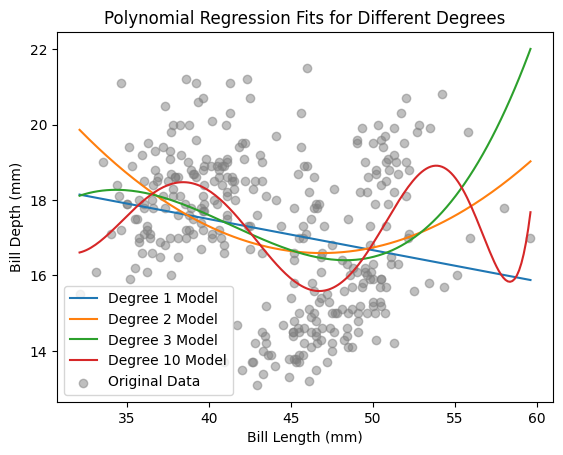

In [37]:

from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd

penguins_encoded = df.dropna()

X = penguins_encoded[['bill_length_mm']]
y = penguins_encoded['bill_depth_mm']

degrees = [1, 2, 3, 10]
models = {}

X_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)


# Loop over each polynomial degree
for degree in degrees:
    # Create polynomial features for the given degree
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit a linear regression model to the polynomial features
    model = LinearRegression()
    model.fit(X_poly, y)

    # Store the model and its degree
    models[degree] = {
        "model": model,
        "coefficients": model.coef_,
        "intercept": model.intercept_
    }

    # Output the coefficients for the given degree
    print(f"Degree {degree} model coefficients:")
    print("Intercept:", model.intercept_)
    print("Coefficients:", model.coef_)
    print("\n")


    X_poly_range = poly.transform(X_range)
    y_pred_range = model.predict(X_poly_range)

    # Print the coefficients for each model
    print(f"Degree {degree} model coefficients:")
    print("Intercept:", model.intercept_)
    print("Coefficients:", model.coef_)
    print("\n")

    # Plot predictions
    plt.plot(X_range, y_pred_range, label=f'Degree {degree} Model')

# Scatter plot of the original data points
plt.scatter(X, y, color='gray', alpha=0.5, label='Original Data')

# Add labels and legend
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Polynomial Regression Fits for Different Degrees')
plt.legend()
plt.show()

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Model with degree one and two are underfitting because it does not capture enough of the data points. Model with degrees 10 is overfitting because it is way too specific to th9is data. Model with degree three seems to be the best because it is slightly nuanced to fit this exact data, but general enough to capture added observations.